<a href="https://colab.research.google.com/github/A-ElMitwally/Deep-learning/blob/main/Intro_to_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
import seaborn as sb
from sklearn.metrics import confusion_matrix

np.random.seed(0)

#preparing data

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


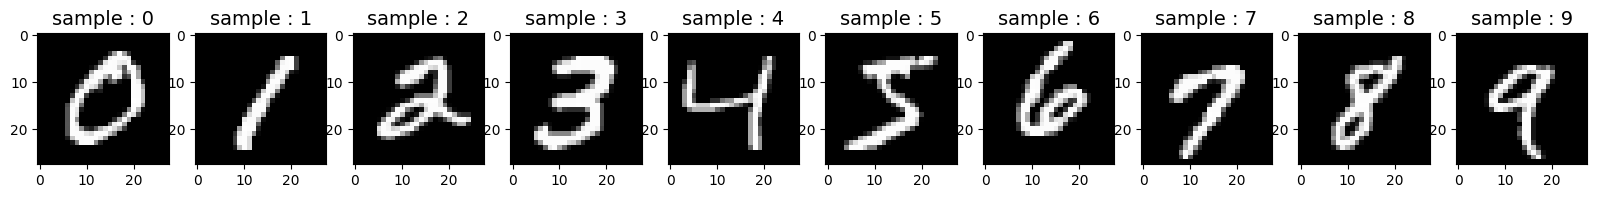

In [ ]:
from keras.datasets import mnist
(x_train , y_train), (x_test, y_test)= mnist.load_data()
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

classes = 10
fig , axis = plt.subplots(1, classes , figsize= (20,20))
for i in range (0, classes):
  sample= x_train[y_train== i][0]
  axis[i].imshow(sample, cmap= 'gray')
  axis[i].set_title("sample : {}".format(i), fontsize= 14)



#formatting data

In [ ]:
#labels in one-hot encoded form
y_train = keras.utils.to_categorical(y_train,classes)
y_test = keras.utils.to_categorical(y_test,classes)
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
#normalizing
x_train= x_train/255.0
x_test = x_test/250.0

#reshaping (taking form of neural netwrok)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


#Creaating Model

In [ ]:
model = Sequential()
model.add(Dense(units= 128,input_shape=(784,) , activation='sigmoid' ))
model.add(Dense(units=128, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(units=10 , activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

#Training

In [ ]:
batch=512
epochs= 10
model.fit(x=x_train, y=y_train, batch_size=batch , epochs= epochs)


Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.3503 - loss: 1.9512
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8443 - loss: 0.6071
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8946 - loss: 0.3821
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9132 - loss: 0.3011
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9236 - loss: 0.2646
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9298 - loss: 0.2423
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9364 - loss: 0.2183
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9438 - loss: 0.1933
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9493 - loss: 0.1792
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9529 - loss: 0.1628


#Evaluation

In [ ]:
loss , acc= model.evaluate(x_test , y_test)
print ("test loss = {} , test accuracy = {}".format(loss , acc))

#predicting number with highest probability
predict = model.predict(x_test)
predict_class = np.argmax(predict , axis=1)
print(predict)
print(predict_class)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9488 - loss: 0.1659
test loss = 0.14620931446552277 , test accuracy = 0.9549000263214111
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[4.72025240e-05 3.83167244e-05 4.53752466e-04 ... 9.97820556e-01
  3.61038838e-06 3.00315907e-04]
 [9.45360574e-04 1.61810184e-03 9.90068257e-01 ... 2.58388045e-05
  4.05898900e-04 1.87347098e-06]
 [1.14053137e-06 9.95534301e-01 1.53321598e-03 ... 1.47587922e-03
  1.92297084e-04 3.42081112e-05]
 ...
 [2.62646427e-06 5.32379236e-05 4.56630114e-05 ... 4.38980496e-04
  9.23688407e-04 8.12990032e-03]
 [7.50000108e-05 8.24546369e-05 3.30670468e-06 ... 1.44117903e-05
  2.60919519e-03 5.49247170e-06]
 [1.15260016e-04 3.26977970e-05 1.25962577e-03 ... 4.02811793e-06
  8.44562146e-06 3.27617977e-06]]
[7 2 1 ... 4 5 6]


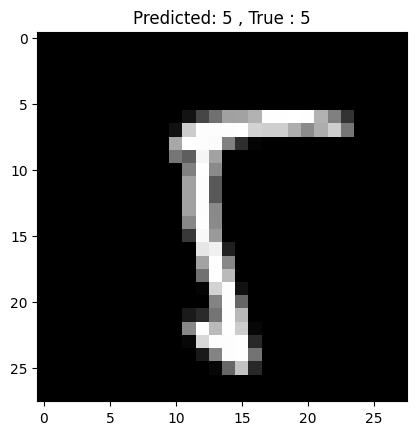

In [ ]:
#Random sample
random_num= np.random.choice(len(x_test))
x_sample = x_test[random_num]
true_num= np.argmax(y_test , axis=1)
sample_true= true_num[random_num]
sample_predict = predict_class[random_num]

plt.title("Predicted: {} , True : {}".format(sample_predict , sample_true))
plt.imshow(x_sample.reshape(28,28), cmap='gray')


#Model Summary

Model accuracy= 0.9549000263214111


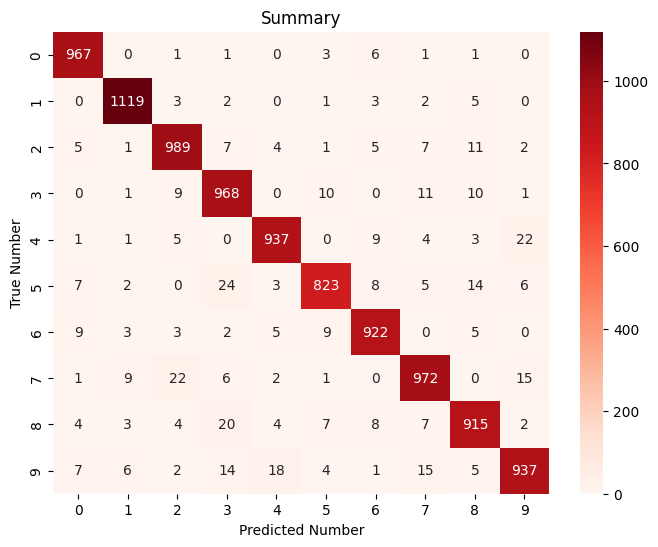

In [ ]:
print("Model accuracy= {}".format(acc))
cm = confusion_matrix(np.argmax(y_test , axis=1), predict_class)
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Number')
plt.ylabel('True Number')
plt.title('Summary')
plt.show()